<a href="https://colab.research.google.com/github/Omweqa101/Wine-quality-prediction/blob/main/WineMLPC_Only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ImportLib

In [ ]:
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras import regularizers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
%matplotlib inline
%load_ext google.colab.data_table

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

# KNN
from sklearn.neighbors import KNeighborsClassifier

#DIcision Tree
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from re import M

#Random Forest
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


##Eva data and Read data

In [ ]:
redwine = '/content/drive/MyDrive/Wine_CSV/winequality-red.csv'
whitewine = '/content/drive/MyDrive/Wine_CSV/winequalityN.csv'
wine = pd.concat(
   map(pd.read_csv, [whitewine, redwine]), ignore_index=True)

In [ ]:
# Change type white=1, red=2
wine[['type']] = wine[['type']].apply(lambda x:x.map({"white":1,"red":2}))
# Score morethan 6 is good, lessthan 6 is bad
wine['quality'] = np.where(wine['quality'] > 6, 1, 0)
wine['quality'].value_counts()

0    6602
1    1494
Name: quality, dtype: int64

Eva data

In [ ]:
wine = wine.dropna()

In [ ]:
numeric_col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 
               'sulphates', 'alcohol']

for x in wine[numeric_col]:
    q75,q25 = np.percentile(wine.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    wine.loc[wine[x] < min,x] = np.nan
    wine.loc[wine[x] > max,x] = np.nan

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
wine.update(wine.fillna(wine.mean()))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:7511: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [ ]:
wine = wine.dropna()
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8062 entries, 0 to 8095
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  8062 non-null   int64  
 1   fixed acidity         8062 non-null   float64
 2   volatile acidity      8062 non-null   float64
 3   citric acid           8062 non-null   float64
 4   residual sugar        8062 non-null   float64
 5   chlorides             8062 non-null   float64
 6   free sulfur dioxide   8062 non-null   float64
 7   total sulfur dioxide  8062 non-null   float64
 8   density               8062 non-null   float64
 9   pH                    8062 non-null   float64
 10  sulphates             8062 non-null   float64
 11  alcohol               8062 non-null   float64
 12  quality               8062 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 881.8 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = wine.drop(columns=['quality'])
X = sc.fit_transform(X)
X

array([[-0.8095934 , -0.18710501, -0.58594083, ..., -1.50117162,
        -0.71251185, -1.43864751],
       [-0.8095934 , -0.87217641, -0.4032674 , ...,  0.43895823,
        -0.39849436, -0.83812822],
       [-0.8095934 ,  0.88943576, -0.52504969, ...,  0.18027425,
        -0.79101622, -0.3233974 ],
       ...,
       [ 1.23518793, -0.87217641,  0.87544664, ...,  1.21501018,
         1.6426193 ,  0.44869882],
       [ 1.23518793, -1.26364579,  1.69747709, ...,  2.1850751 ,
         1.32860182, -0.23760893],
       [ 1.23518793, -1.16577844, -0.34237626, ...,  1.02099719,
         0.93607996,  0.44869882]])

In [ ]:
y = wine['quality']
y

0       0
1       0
2       0
3       0
4       0
       ..
8091    0
8092    0
8093    0
8094    0
8095    0
Name: quality, Length: 8062, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                     train_size = 0.85, 
                                     test_size = 0.15, 
                                     random_state = 1000)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, dtype ="uint8")
y_test = to_categorical(y_test, dtype ="uint8")

# MLP

## 1-Hidden layers

In [ ]:
def createMLP():
  model = Sequential()

  model.add(Dense(12, input_dim=12, activation='relu'))

  model.add(Dense(2,activation='sigmoid'))

  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  
  return model

In [ ]:
model = createMLP()
model.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_163 (Dense)           (None, 12)                156       
                                                                 
 dense_164 (Dense)           (None, 2)                 26        
                                                                 
Total params: 182
Trainable params: 182
Non-trainable params: 0
_________________________________________________________________


In [ ]:
MLP_pre = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs= 50, batch_size=10)

Epoch 1/50
686/686 [==============================] - 2s 2ms/step - loss: 0.5053 - accuracy: 0.7534 - val_loss: 0.3835 - val_accuracy: 0.8124
Epoch 2/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3850 - accuracy: 0.8252 - val_loss: 0.3635 - val_accuracy: 0.8339
Epoch 3/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3726 - accuracy: 0.8320 - val_loss: 0.3546 - val_accuracy: 0.8339
Epoch 4/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3654 - accuracy: 0.8358 - val_loss: 0.3454 - val_accuracy: 0.8405
Epoch 5/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3610 - accuracy: 0.8342 - val_loss: 0.3437 - val_accuracy: 0.8430
Epoch 6/50
686/686 [==============================] - 2s 2ms/step - loss: 0.3576 - accuracy: 0.8365 - val_loss: 0.3426 - val_accuracy: 0.8397
Epoch 7/50
686/686 [==============================] - 2s 3ms/step - loss: 0.3545 - accuracy: 0.8389 - val_loss: 0.3412 - val_accuracy: 0.8438
Epoch 

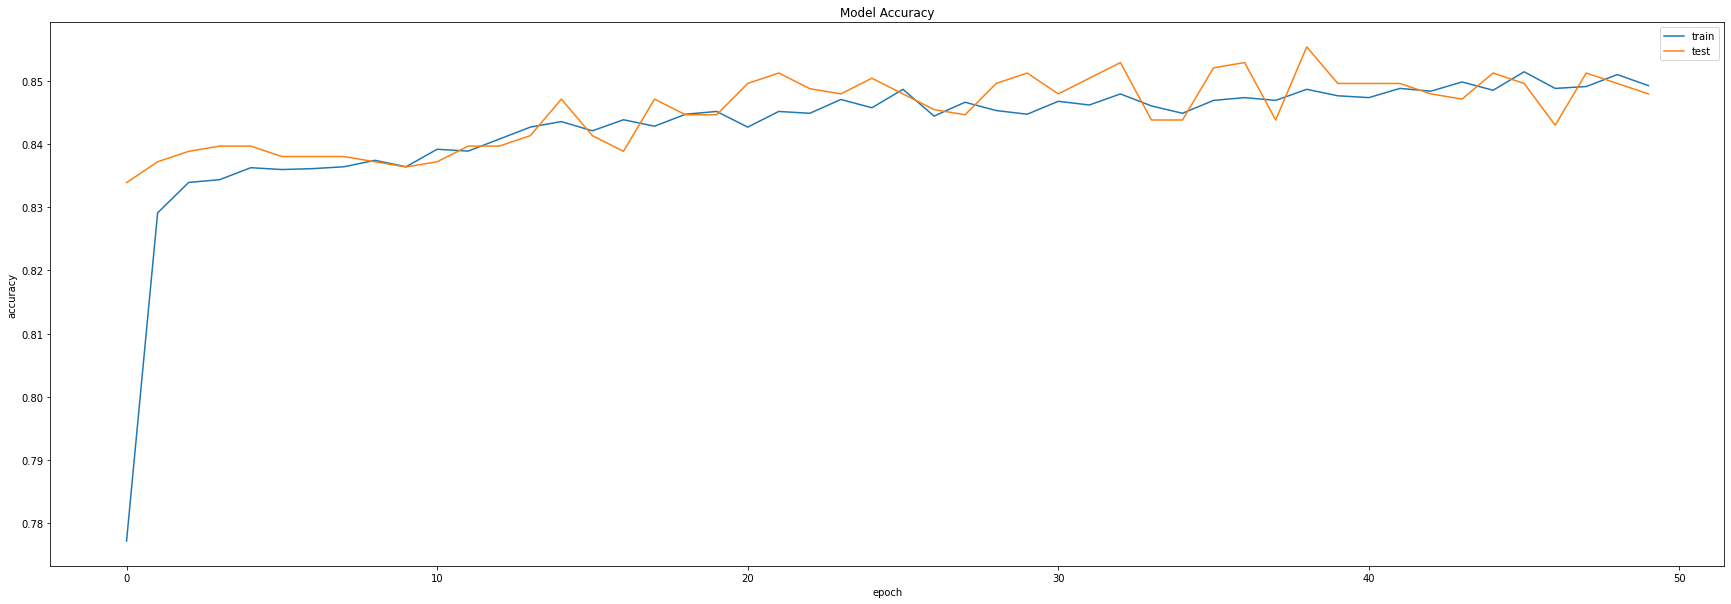

In [ ]:
%matplotlib inline
# Model accuracy
plt.figure(figsize=(30,10))
plt.plot(MLP_pre.history['accuracy'])
plt.plot(MLP_pre.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

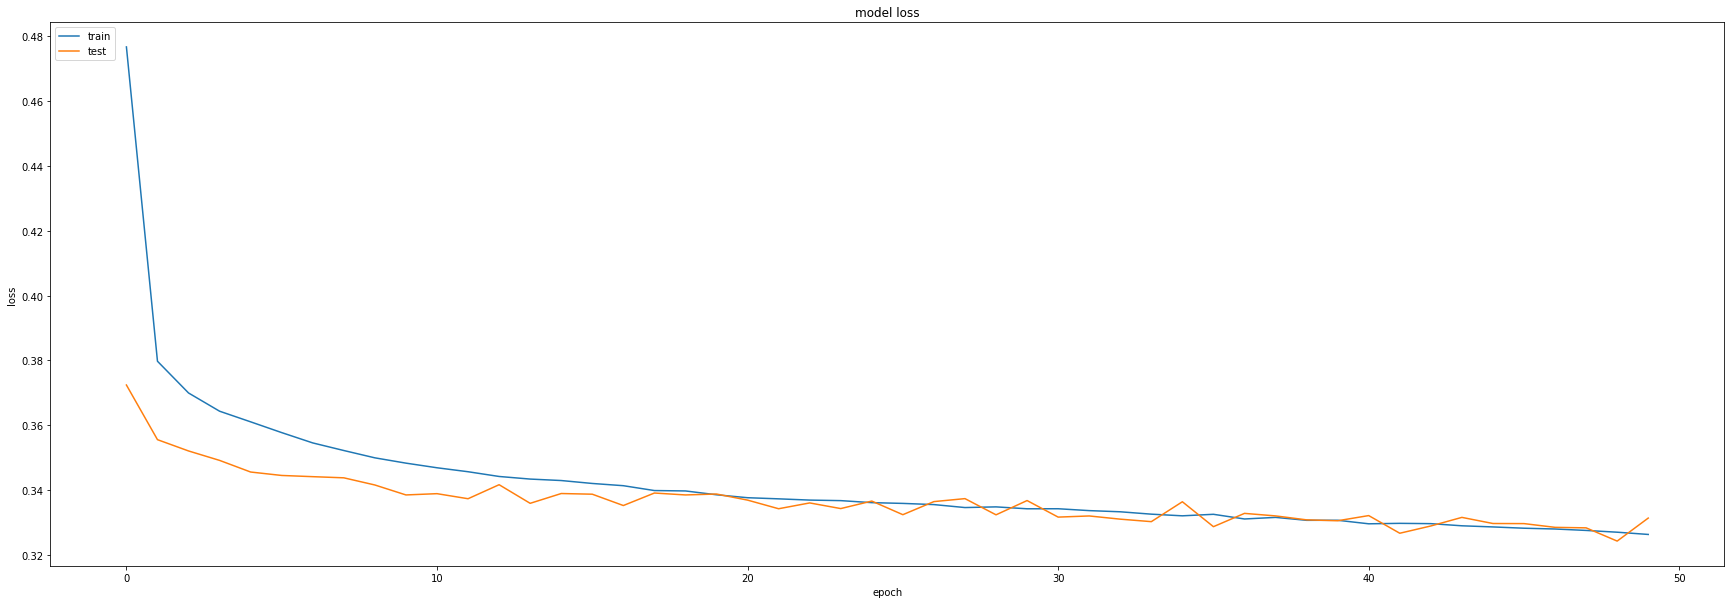

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(MLP_pre.history['loss'])
plt.plot(MLP_pre.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

-----------------------


In [ ]:
# No drop out
def createMLP():
  model = Sequential()

  model.add(Dense(50, input_dim=12, activation='relu'))

  model.add(Dense(2,activation='sigmoid'))

  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  
  return model

In [ ]:
model = createMLP()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                650       
                                                                 
 dense_9 (Dense)             (None, 2)                 102       
                                                                 
Total params: 752
Trainable params: 752
Non-trainable params: 0
_________________________________________________________________


In [ ]:
MLP_pre = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs= 50, batch_size=10)

Epoch 1/50
686/686 [==============================] - 3s 4ms/step - loss: 0.2665 - accuracy: 0.8809 - val_loss: 0.3147 - val_accuracy: 0.8628
Epoch 2/50
686/686 [==============================] - 3s 4ms/step - loss: 0.2668 - accuracy: 0.8796 - val_loss: 0.3117 - val_accuracy: 0.8678
Epoch 3/50
686/686 [==============================] - 2s 2ms/step - loss: 0.2643 - accuracy: 0.8792 - val_loss: 0.3156 - val_accuracy: 0.8587
Epoch 4/50
686/686 [==============================] - 1s 2ms/step - loss: 0.2650 - accuracy: 0.8805 - val_loss: 0.3054 - val_accuracy: 0.8603
Epoch 5/50
686/686 [==============================] - 1s 2ms/step - loss: 0.2665 - accuracy: 0.8799 - val_loss: 0.3110 - val_accuracy: 0.8636
Epoch 6/50
686/686 [==============================] - 1s 2ms/step - loss: 0.2637 - accuracy: 0.8797 - val_loss: 0.3124 - val_accuracy: 0.8669
Epoch 7/50
686/686 [==============================] - 1s 2ms/step - loss: 0.2642 - accuracy: 0.8835 - val_loss: 0.3156 - val_accuracy: 0.8603
Epoch 

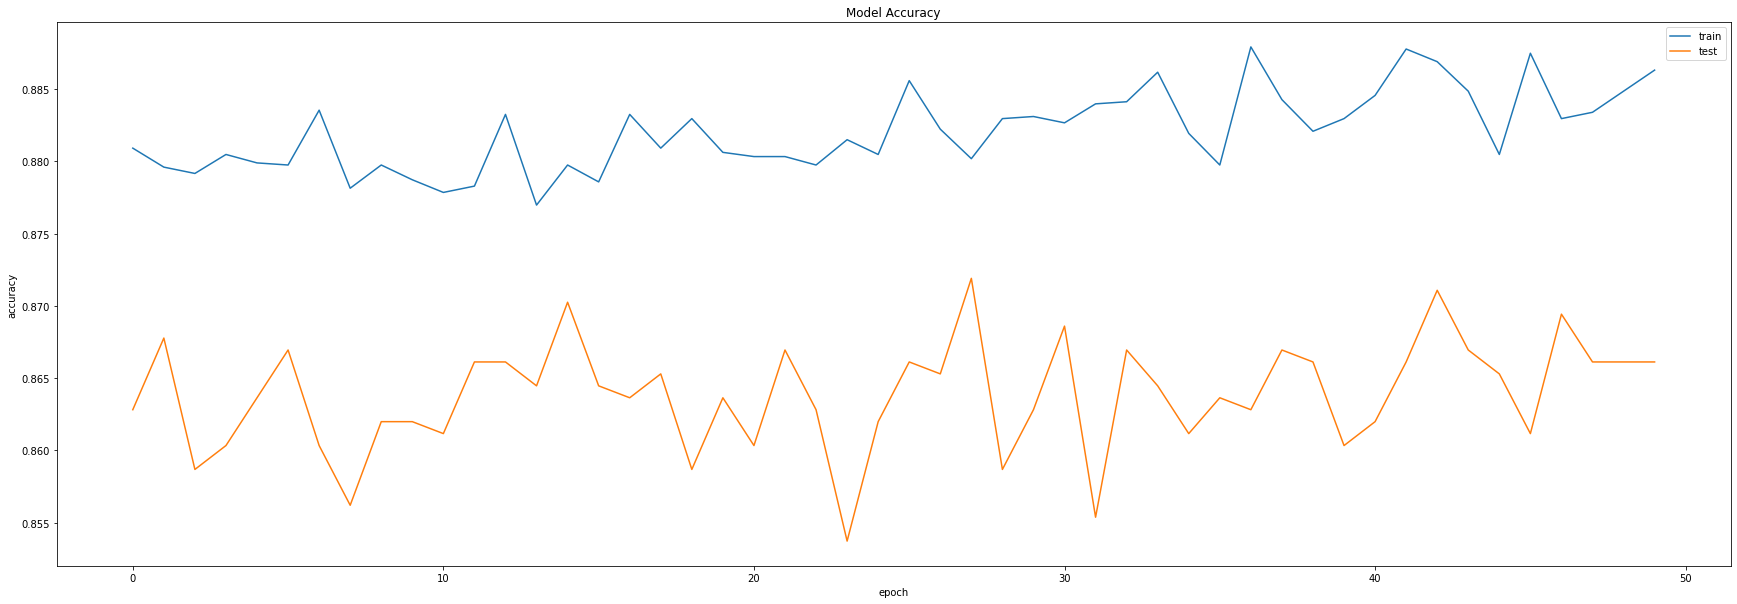

In [ ]:
%matplotlib inline
# Model accuracy
plt.figure(figsize=(30,10))
plt.plot(MLP_pre.history['accuracy'])
plt.plot(MLP_pre.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

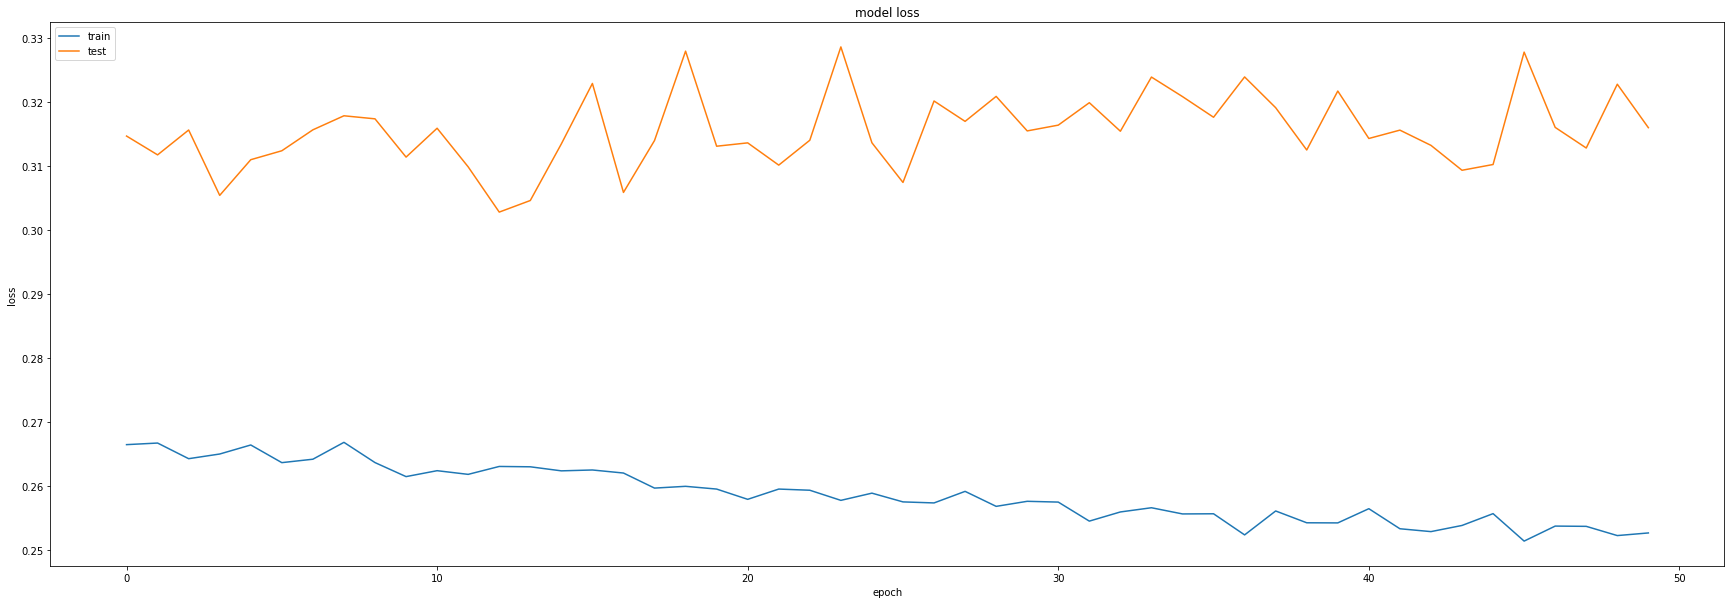

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(MLP_pre.history['loss'])
plt.plot(MLP_pre.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

--------------------

In [ ]:
def createMLP():
  model = Sequential()

  model.add(Dense(50, input_dim=12, activation='relu',kernel_regularizer= regularizers.L2(0.1)))
  model.add(Dropout(0.01))
  model.add(Dense(2,activation='sigmoid'))

  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  
  return model

In [ ]:
model = createMLP()
model.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_113 (Dense)           (None, 50)                650       
                                                                 
 dropout_21 (Dropout)        (None, 50)                0         
                                                                 
 dense_114 (Dense)           (None, 2)                 102       
                                                                 
Total params: 752
Trainable params: 752
Non-trainable params: 0
_________________________________________________________________


In [ ]:
MLP_pre = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs= 50, batch_size=10)

Epoch 1/50
686/686 [==============================] - 2s 2ms/step - loss: 0.7423 - accuracy: 0.8199 - val_loss: 0.3967 - val_accuracy: 0.8281
Epoch 2/50
686/686 [==============================] - 1s 2ms/step - loss: 0.4014 - accuracy: 0.8259 - val_loss: 0.3857 - val_accuracy: 0.8248
Epoch 3/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3963 - accuracy: 0.8294 - val_loss: 0.3845 - val_accuracy: 0.8347
Epoch 4/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3922 - accuracy: 0.8304 - val_loss: 0.3838 - val_accuracy: 0.8273
Epoch 5/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3918 - accuracy: 0.8285 - val_loss: 0.3748 - val_accuracy: 0.8306
Epoch 6/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3906 - accuracy: 0.8290 - val_loss: 0.3721 - val_accuracy: 0.8372
Epoch 7/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3874 - accuracy: 0.8314 - val_loss: 0.3789 - val_accuracy: 0.8256
Epoch 

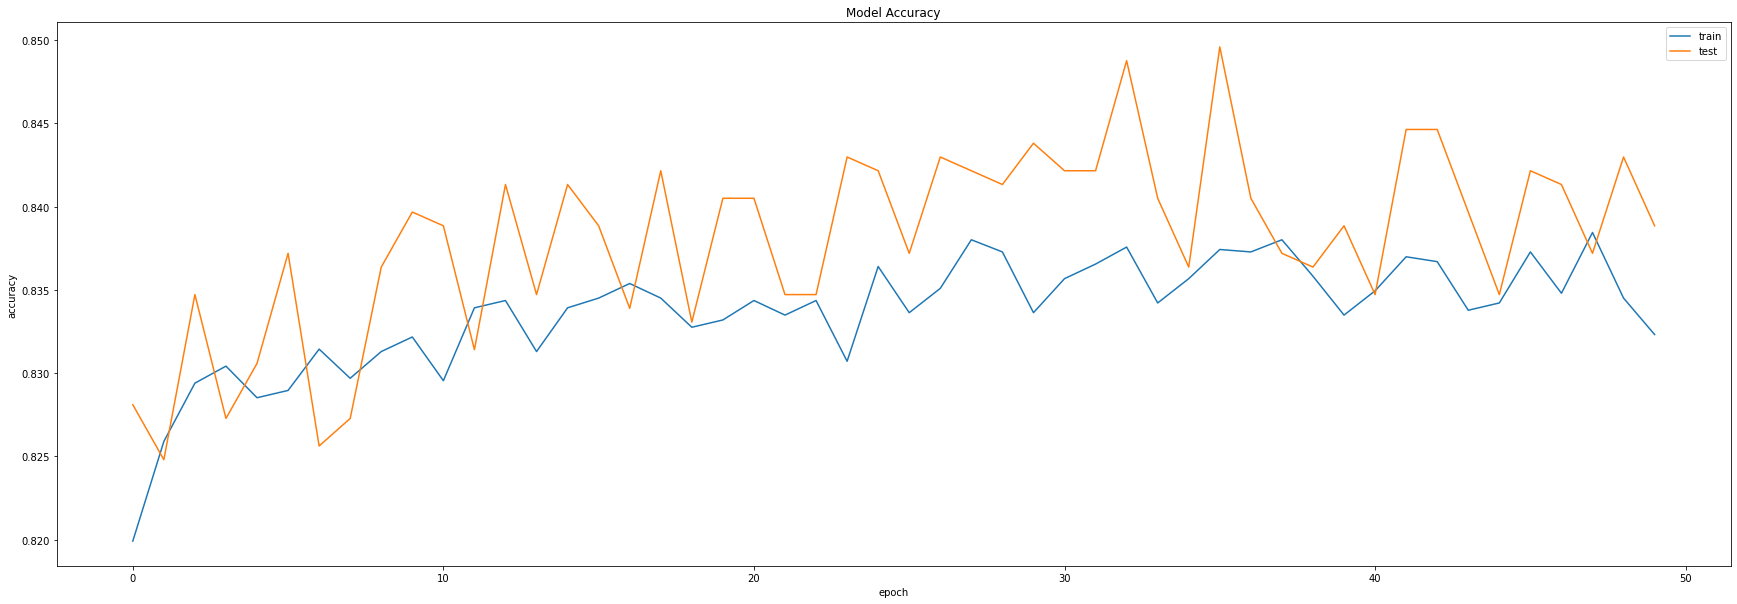

In [ ]:
%matplotlib inline
# Model accuracy
plt.figure(figsize=(30,10))
plt.plot(MLP_pre.history['accuracy'])
plt.plot(MLP_pre.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

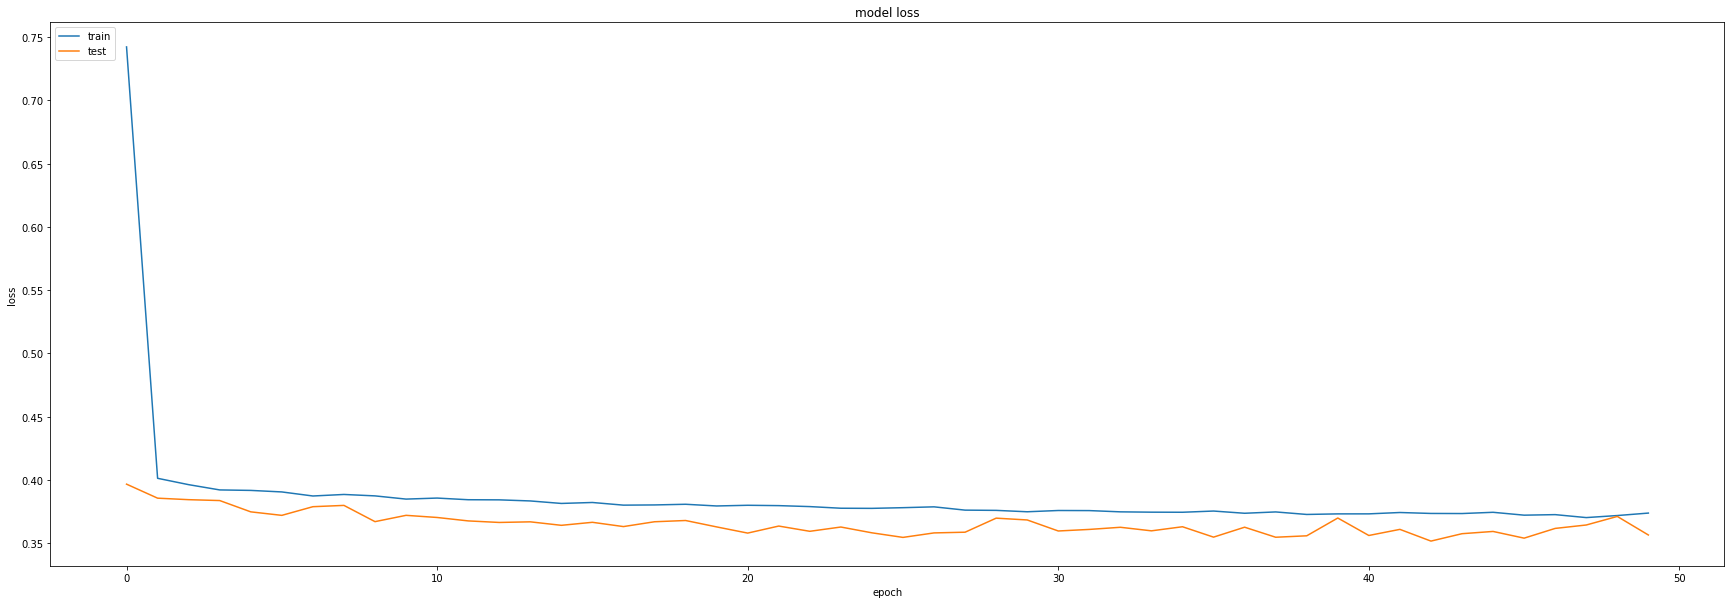

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(MLP_pre.history['loss'])
plt.plot(MLP_pre.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 2-Hidden layers

In [ ]:
def createMLP():
  model = Sequential()

  model.add(Dense(12, input_dim=12, activation='relu',kernel_regularizer= regularizers.L2(0.2) ))
  model.add(Dropout(0.1))
  model.add(Dense(6, activation='relu'))
  

  model.add(Dense(2, activation='sigmoid'))

  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  
  return model

In [ ]:
model = createMLP()
model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_115 (Dense)           (None, 12)                156       
                                                                 
 dropout_22 (Dropout)        (None, 12)                0         
                                                                 
 dense_116 (Dense)           (None, 6)                 78        
                                                                 
 dense_117 (Dense)           (None, 2)                 14        
                                                                 
Total params: 248
Trainable params: 248
Non-trainable params: 0
_________________________________________________________________


In [ ]:
MLP_pre = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs= 50, batch_size=10)

Epoch 1/50
686/686 [==============================] - 2s 2ms/step - loss: 1.0939 - accuracy: 0.7968 - val_loss: 0.4269 - val_accuracy: 0.8140
Epoch 2/50
686/686 [==============================] - 1s 2ms/step - loss: 0.4127 - accuracy: 0.8206 - val_loss: 0.3897 - val_accuracy: 0.8273
Epoch 3/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3990 - accuracy: 0.8266 - val_loss: 0.3796 - val_accuracy: 0.8372
Epoch 4/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3980 - accuracy: 0.8262 - val_loss: 0.3797 - val_accuracy: 0.8364
Epoch 5/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3950 - accuracy: 0.8255 - val_loss: 0.3767 - val_accuracy: 0.8298
Epoch 6/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3925 - accuracy: 0.8285 - val_loss: 0.3721 - val_accuracy: 0.8314
Epoch 7/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3915 - accuracy: 0.8298 - val_loss: 0.3737 - val_accuracy: 0.8264
Epoch 

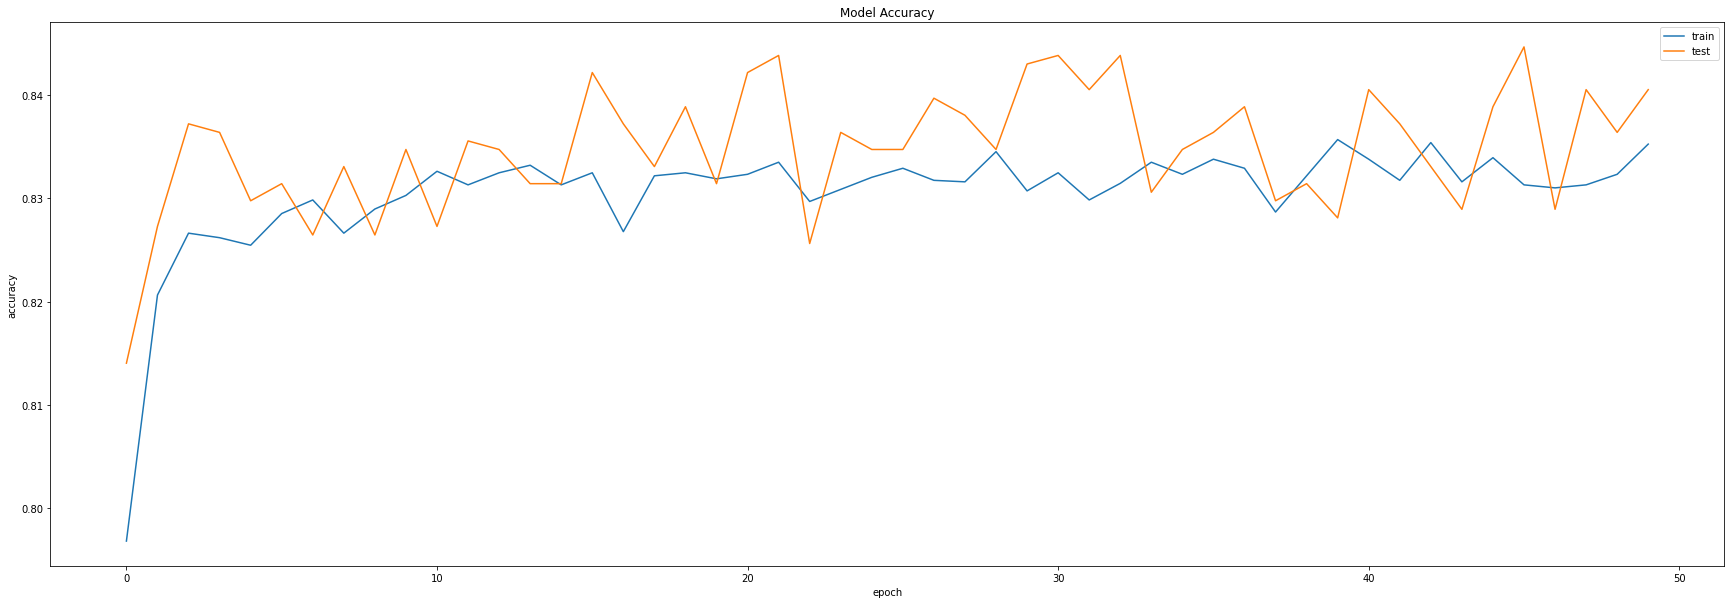

In [ ]:
%matplotlib inline
# Model accuracy
plt.figure(figsize=(30,10))
plt.plot(MLP_pre.history['accuracy'])
plt.plot(MLP_pre.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

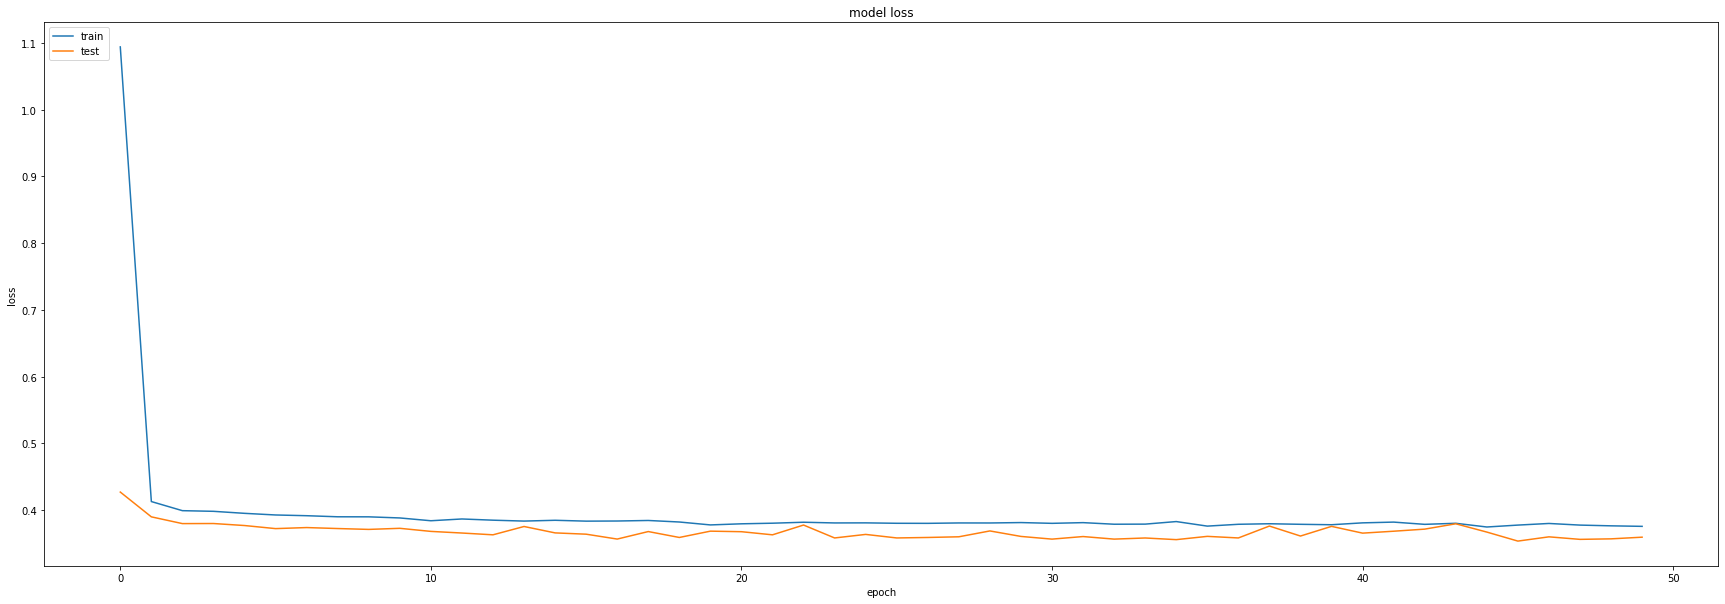

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(MLP_pre.history['loss'])
plt.plot(MLP_pre.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

--------------------------------------

In [ ]:
def createMLP():
  model = Sequential()

  model.add(Dense(50, input_dim=12, activation='relu',kernel_regularizer= regularizers.L2(0.2) ))
  model.add(Dropout(0.1))
  model.add(Dense(25, activation='relu'))
  

  model.add(Dense(2, activation='sigmoid'))

  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  
  return model

In [ ]:
model = createMLP()
model.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_118 (Dense)           (None, 50)                650       
                                                                 
 dropout_23 (Dropout)        (None, 50)                0         
                                                                 
 dense_119 (Dense)           (None, 25)                1275      
                                                                 
 dense_120 (Dense)           (None, 2)                 52        
                                                                 
Total params: 1,977
Trainable params: 1,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
MLP_pre = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs= 50, batch_size=10)

Epoch 1/50
686/686 [==============================] - 2s 2ms/step - loss: 1.0233 - accuracy: 0.8190 - val_loss: 0.3944 - val_accuracy: 0.8198
Epoch 2/50
686/686 [==============================] - 1s 2ms/step - loss: 0.4010 - accuracy: 0.8203 - val_loss: 0.3853 - val_accuracy: 0.8248
Epoch 3/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3969 - accuracy: 0.8285 - val_loss: 0.3787 - val_accuracy: 0.8281
Epoch 4/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3950 - accuracy: 0.8290 - val_loss: 0.3909 - val_accuracy: 0.8322
Epoch 5/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3966 - accuracy: 0.8252 - val_loss: 0.3762 - val_accuracy: 0.8388
Epoch 6/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3924 - accuracy: 0.8292 - val_loss: 0.3694 - val_accuracy: 0.8339
Epoch 7/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3887 - accuracy: 0.8290 - val_loss: 0.3718 - val_accuracy: 0.8355
Epoch 

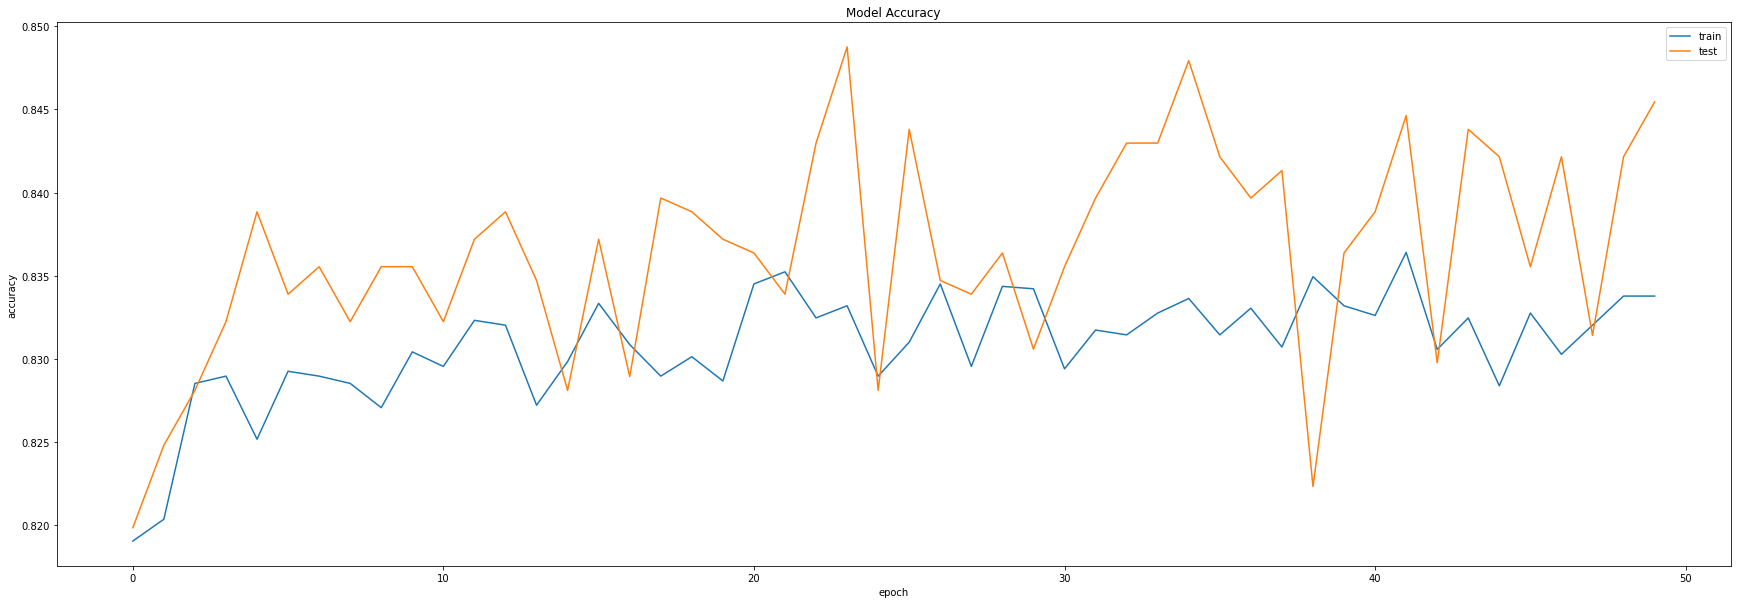

In [ ]:
%matplotlib inline
# Model accuracy
plt.figure(figsize=(30,10))
plt.plot(MLP_pre.history['accuracy'])
plt.plot(MLP_pre.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

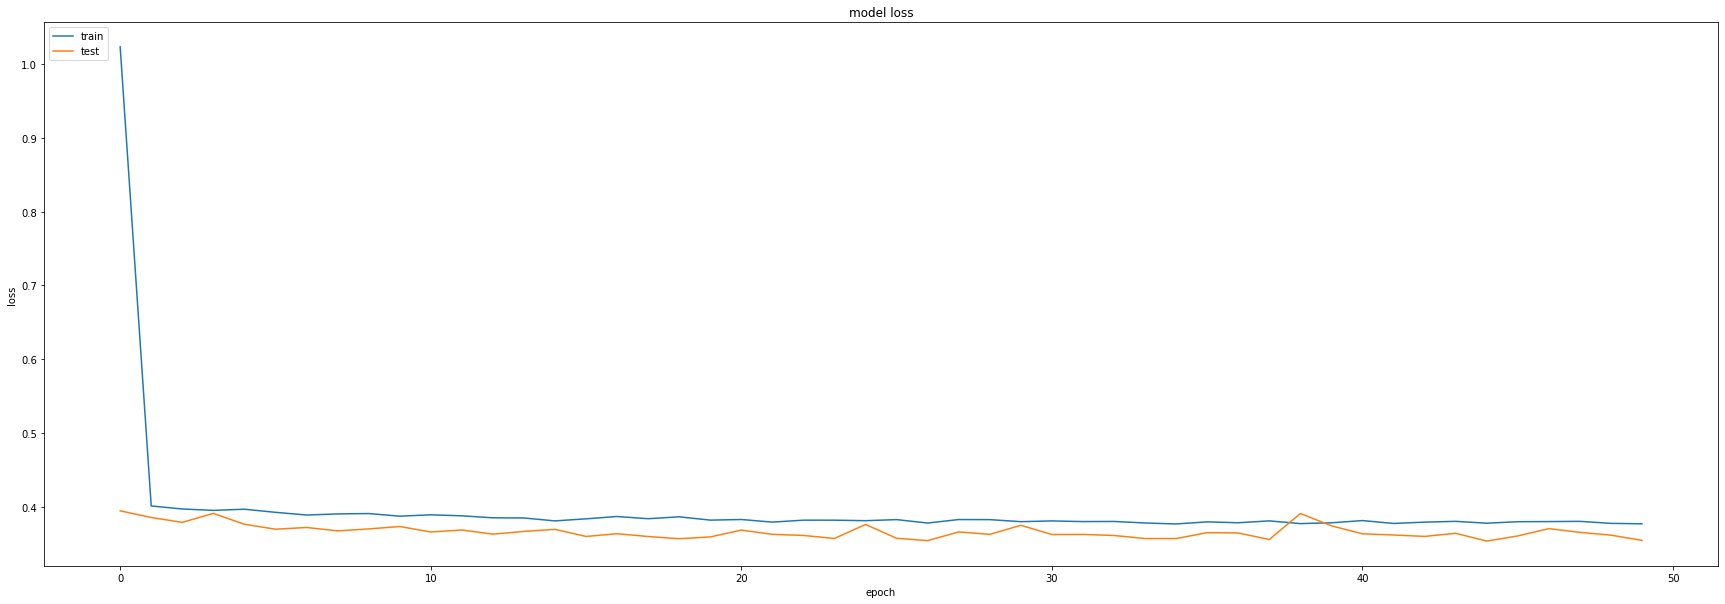

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(MLP_pre.history['loss'])
plt.plot(MLP_pre.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
def createMLP():
  model = Sequential()

  model.add(Dense(50, input_dim=12, activation='relu',kernel_regularizer= regularizers.L2(0.1)))

  model.add(Dense(25, activation='relu'))
  model.add(Dropout(0.1))

  model.add(Dense(2, activation='sigmoid'))

  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  
  return model

In [ ]:
model = createMLP()
model.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 50)                650       
                                                                 
 dense_145 (Dense)           (None, 25)                1275      
                                                                 
 dropout_30 (Dropout)        (None, 25)                0         
                                                                 
 dense_146 (Dense)           (None, 2)                 52        
                                                                 
Total params: 1,977
Trainable params: 1,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
MLP_pre = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs= 50, batch_size=10)

Epoch 1/50
686/686 [==============================] - 2s 2ms/step - loss: 0.7186 - accuracy: 0.8101 - val_loss: 0.3811 - val_accuracy: 0.8264
Epoch 2/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3962 - accuracy: 0.8303 - val_loss: 0.3705 - val_accuracy: 0.8388
Epoch 3/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3931 - accuracy: 0.8309 - val_loss: 0.3686 - val_accuracy: 0.8339
Epoch 4/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3887 - accuracy: 0.8275 - val_loss: 0.3666 - val_accuracy: 0.8347
Epoch 5/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3858 - accuracy: 0.8301 - val_loss: 0.3908 - val_accuracy: 0.8256
Epoch 6/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3847 - accuracy: 0.8325 - val_loss: 0.3631 - val_accuracy: 0.8380
Epoch 7/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3837 - accuracy: 0.8349 - val_loss: 0.3597 - val_accuracy: 0.8405
Epoch 

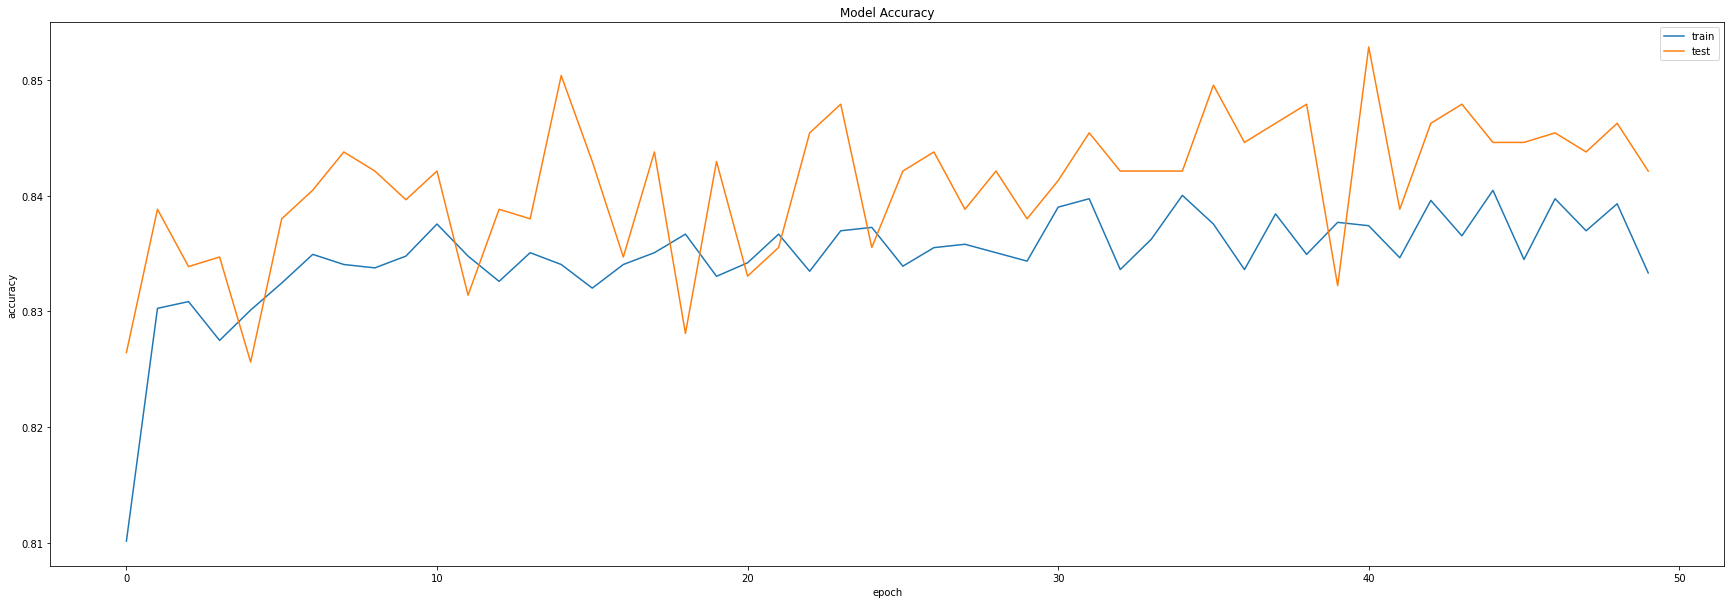

In [ ]:
%matplotlib inline
# Model accuracy
plt.figure(figsize=(30,10))
plt.plot(MLP_pre.history['accuracy'])
plt.plot(MLP_pre.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

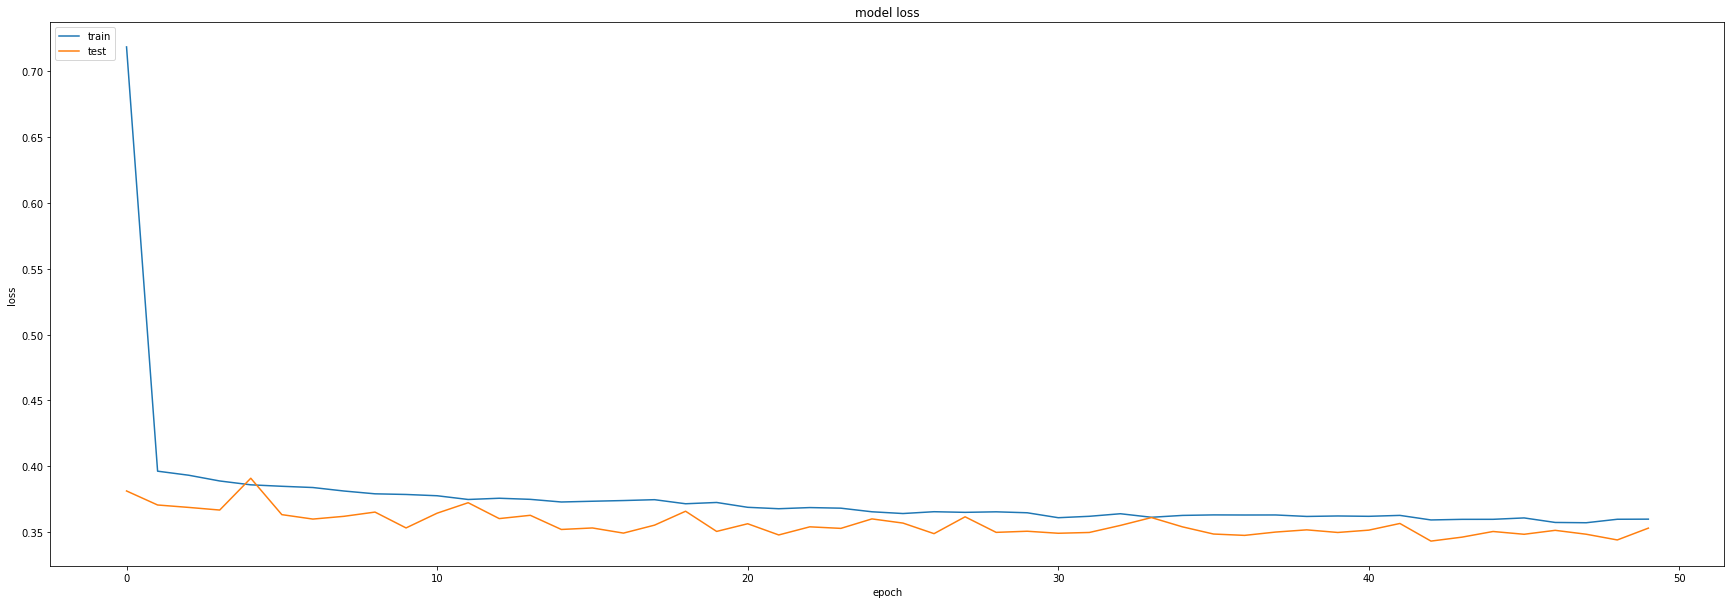

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(MLP_pre.history['loss'])
plt.plot(MLP_pre.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

------------------

## 3-Hidden layers

In [ ]:
def createMLP():
  model = Sequential()

  model.add(Dense(50, input_dim=12, activation='relu',kernel_regularizer= regularizers.L2(0.2) ))
  model.add(Dropout(0.1))
  model.add(Dense(25, activation='relu'))
  model.add(Dense(12, activation='relu'))
  model.add(Dense(2, activation='sigmoid'))

  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  
  return model

In [ ]:
model = createMLP()
model.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_155 (Dense)           (None, 50)                650       
                                                                 
 dropout_33 (Dropout)        (None, 50)                0         
                                                                 
 dense_156 (Dense)           (None, 25)                1275      
                                                                 
 dense_157 (Dense)           (None, 12)                312       
                                                                 
 dense_158 (Dense)           (None, 2)                 26        
                                                                 
Total params: 2,263
Trainable params: 2,263
Non-trainable params: 0
_________________________________________________________________


In [ ]:
MLP_pre = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs= 50, batch_size=10)

Epoch 1/50
686/686 [==============================] - 2s 2ms/step - loss: 0.9713 - accuracy: 0.8186 - val_loss: 0.3910 - val_accuracy: 0.8289
Epoch 2/50
686/686 [==============================] - 1s 2ms/step - loss: 0.4000 - accuracy: 0.8300 - val_loss: 0.3783 - val_accuracy: 0.8231
Epoch 3/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3938 - accuracy: 0.8284 - val_loss: 0.3925 - val_accuracy: 0.8281
Epoch 4/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3937 - accuracy: 0.8294 - val_loss: 0.3831 - val_accuracy: 0.8306
Epoch 5/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3915 - accuracy: 0.8273 - val_loss: 0.3649 - val_accuracy: 0.8322
Epoch 6/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3929 - accuracy: 0.8253 - val_loss: 0.3716 - val_accuracy: 0.8347
Epoch 7/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3882 - accuracy: 0.8268 - val_loss: 0.3619 - val_accuracy: 0.8380
Epoch 

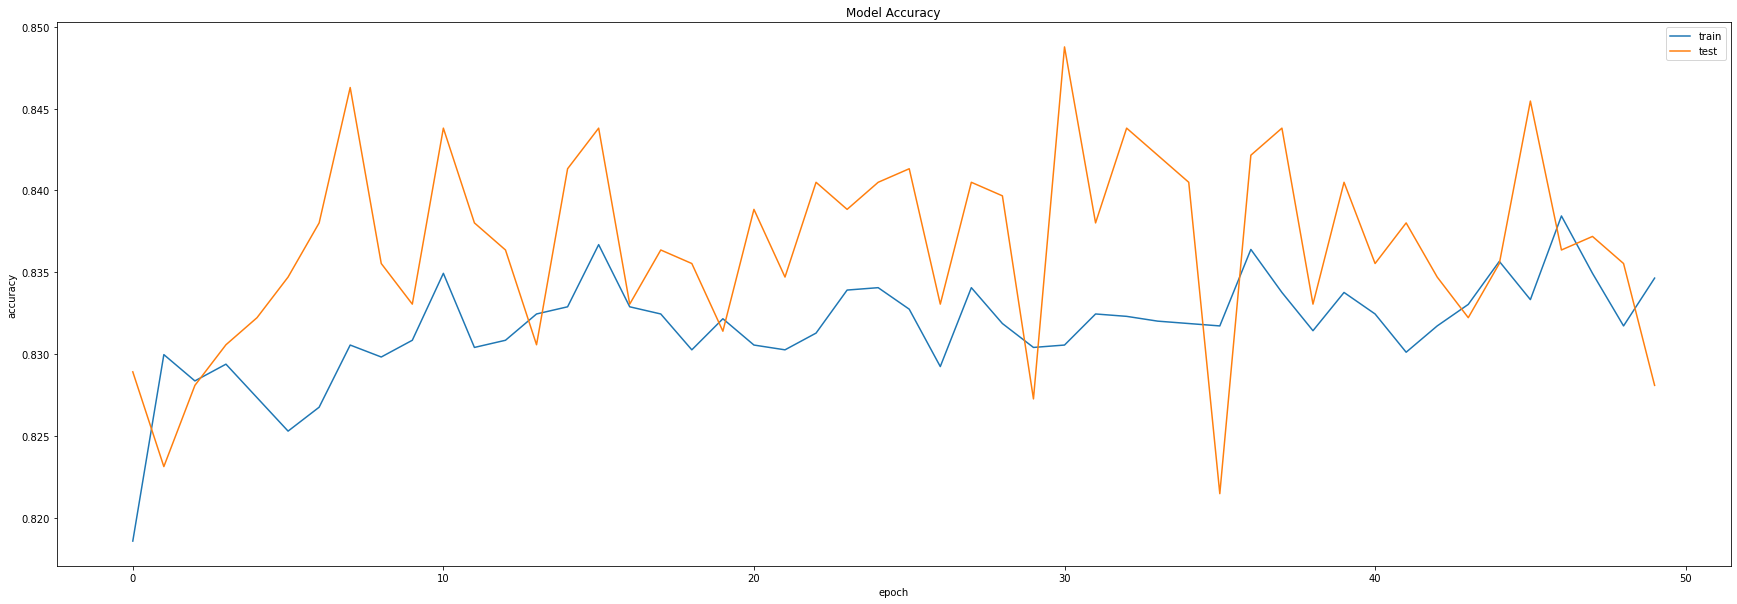

In [ ]:
%matplotlib inline
# Model accuracy
plt.figure(figsize=(30,10))
plt.plot(MLP_pre.history['accuracy'])
plt.plot(MLP_pre.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

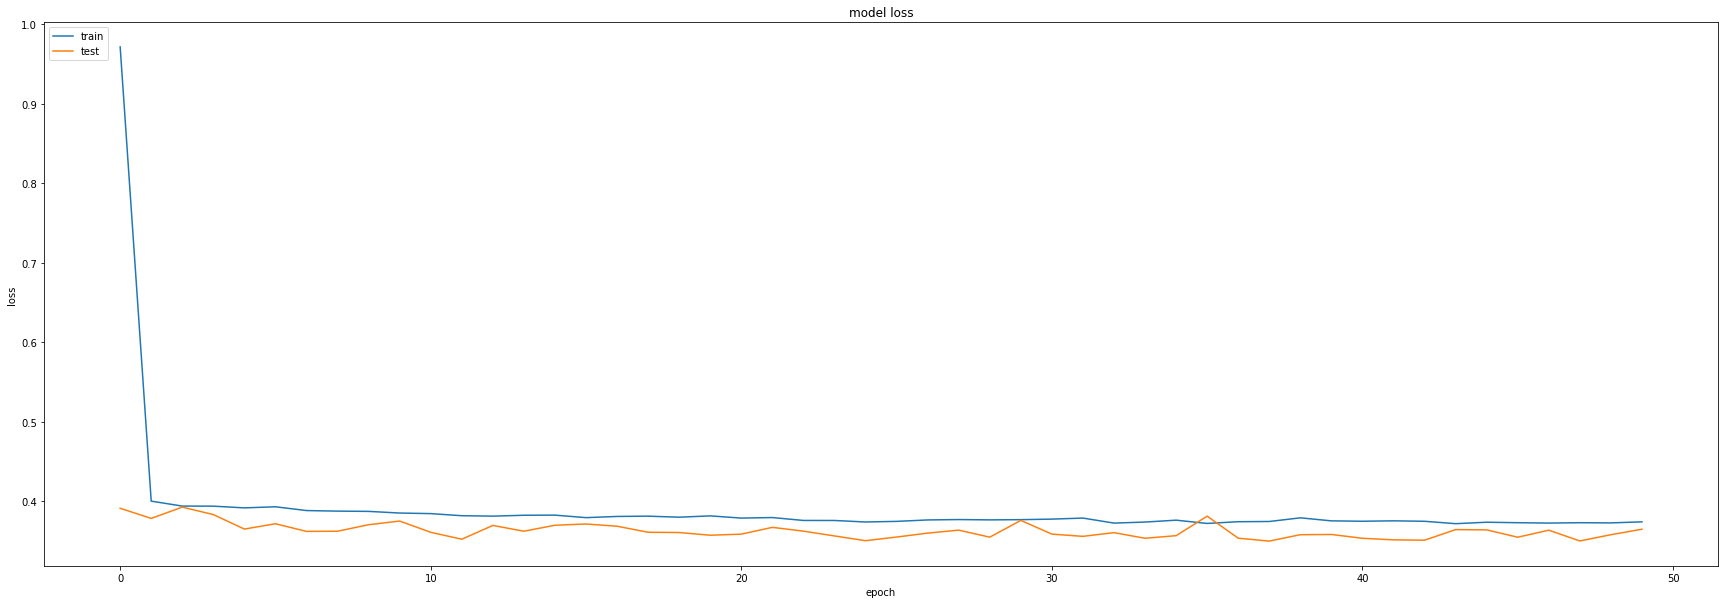

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(MLP_pre.history['loss'])
plt.plot(MLP_pre.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

----------------------------------------

In [ ]:
def createMLP():
  model = Sequential()

  model.add(Dense(25, input_dim=12, activation='relu',kernel_regularizer= regularizers.L2(0.2) ))
  model.add(Dropout(0.1))
  model.add(Dense(12, activation='relu'))
  model.add(Dense(6, activation='relu'))
  
  model.add(Dense(2, activation='sigmoid'))

  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  
  return model

In [ ]:
model = createMLP()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 25)                325       
                                                                 
 dropout_4 (Dropout)         (None, 25)                0         
                                                                 
 dense_11 (Dense)            (None, 12)                312       
                                                                 
 dense_12 (Dense)            (None, 6)                 78        
                                                                 
 dense_13 (Dense)            (None, 2)                 14        
                                                                 
Total params: 729
Trainable params: 729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
MLP_pre = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs= 50, batch_size=10)

Epoch 1/50
686/686 [==============================] - 2s 3ms/step - loss: 1.0625 - accuracy: 0.8160 - val_loss: 0.3949 - val_accuracy: 0.8182
Epoch 2/50
686/686 [==============================] - 1s 2ms/step - loss: 0.4028 - accuracy: 0.8292 - val_loss: 0.3781 - val_accuracy: 0.8264
Epoch 3/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3951 - accuracy: 0.8304 - val_loss: 0.3805 - val_accuracy: 0.8355
Epoch 4/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3920 - accuracy: 0.8266 - val_loss: 0.3777 - val_accuracy: 0.8413
Epoch 5/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3912 - accuracy: 0.8297 - val_loss: 0.3945 - val_accuracy: 0.8298
Epoch 6/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3902 - accuracy: 0.8249 - val_loss: 0.3746 - val_accuracy: 0.8463
Epoch 7/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3885 - accuracy: 0.8298 - val_loss: 0.4011 - val_accuracy: 0.8339
Epoch 

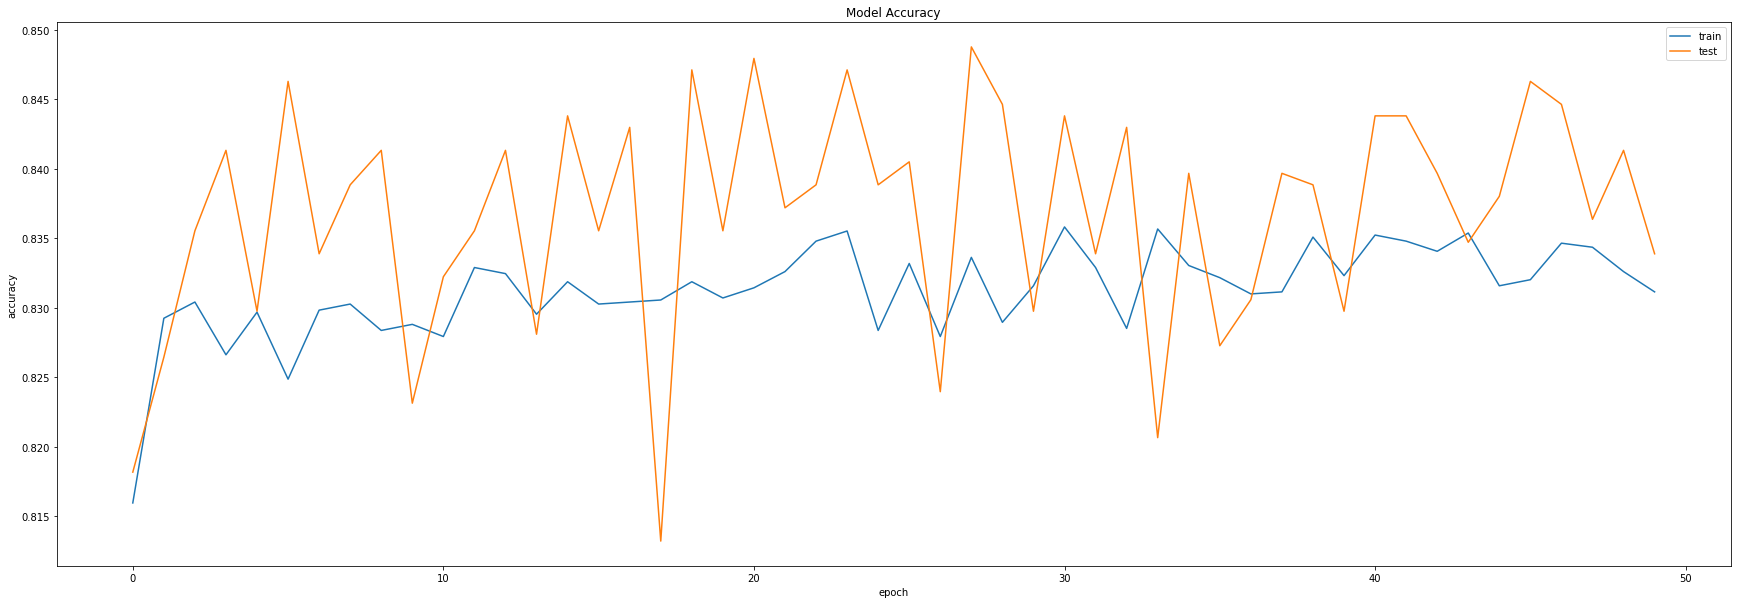

In [ ]:
%matplotlib inline
# Model accuracy
plt.figure(figsize=(30,10))
plt.plot(MLP_pre.history['accuracy'])
plt.plot(MLP_pre.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

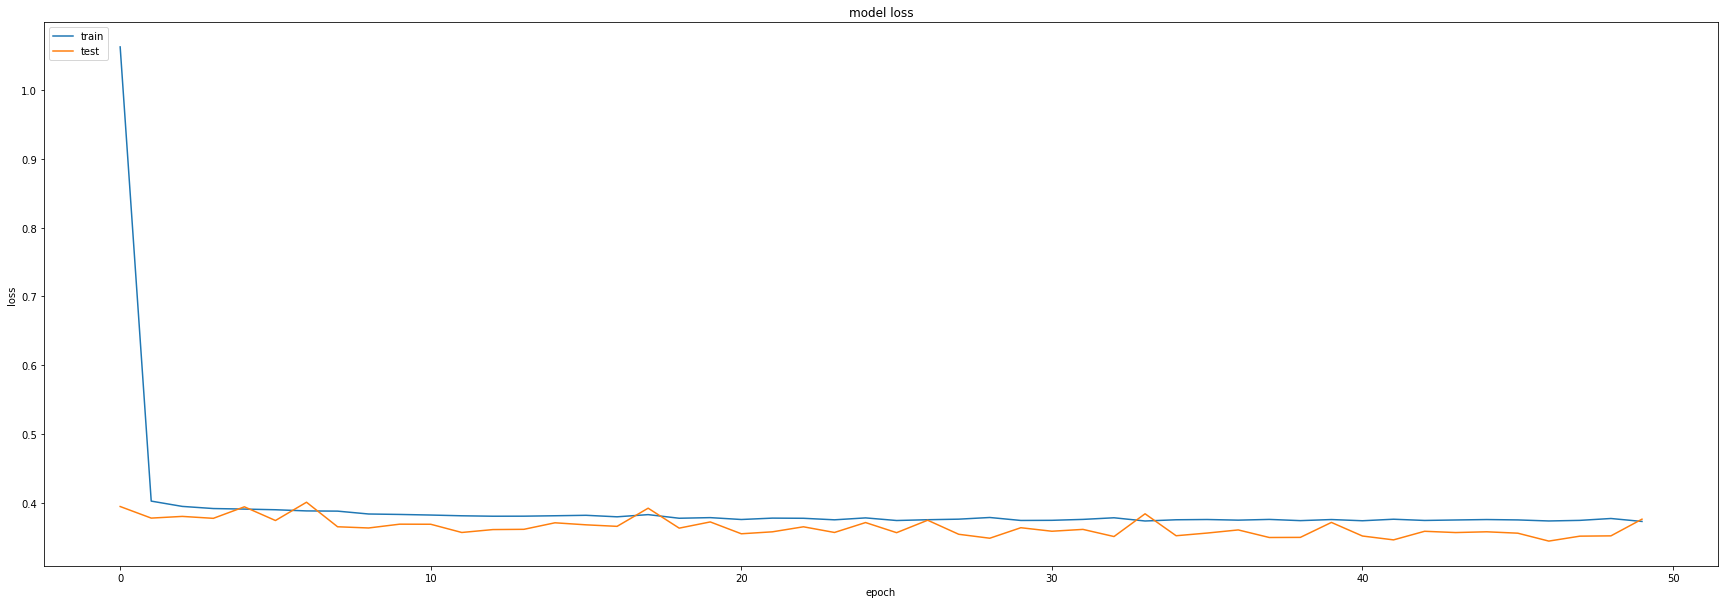

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(MLP_pre.history['loss'])
plt.plot(MLP_pre.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

------------------------------------

In [ ]:
def createMLP():
  model = Sequential()

  model.add(Dense(75, input_dim=12, activation='relu',kernel_regularizer= regularizers.L2(0.1) ))
  model.add(Dropout(0.1))
  model.add(Dense(50, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(12, activation='relu'))
  model.add(Dense(2, activation='sigmoid'))

  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  
  return model

In [ ]:
model = createMLP()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 75)                975       
                                                                 
 dropout_7 (Dropout)         (None, 75)                0         
                                                                 
 dense_19 (Dense)            (None, 50)                3800      
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_20 (Dense)            (None, 12)                612       
                                                                 
 dense_21 (Dense)            (None, 2)                 26        
                                                                 
Total params: 5,413
Trainable params: 5,413
Non-traina

In [ ]:
MLP_pre = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs= 50, batch_size=10)

Epoch 1/50
686/686 [==============================] - 2s 2ms/step - loss: 0.7104 - accuracy: 0.8148 - val_loss: 0.3746 - val_accuracy: 0.8372
Epoch 2/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3948 - accuracy: 0.8288 - val_loss: 0.3802 - val_accuracy: 0.8289
Epoch 3/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3910 - accuracy: 0.8275 - val_loss: 0.3716 - val_accuracy: 0.8355
Epoch 4/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3867 - accuracy: 0.8287 - val_loss: 0.3714 - val_accuracy: 0.8264
Epoch 5/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3846 - accuracy: 0.8326 - val_loss: 0.3584 - val_accuracy: 0.8388
Epoch 6/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3818 - accuracy: 0.8288 - val_loss: 0.3681 - val_accuracy: 0.8339
Epoch 7/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3842 - accuracy: 0.8287 - val_loss: 0.3795 - val_accuracy: 0.8248
Epoch 

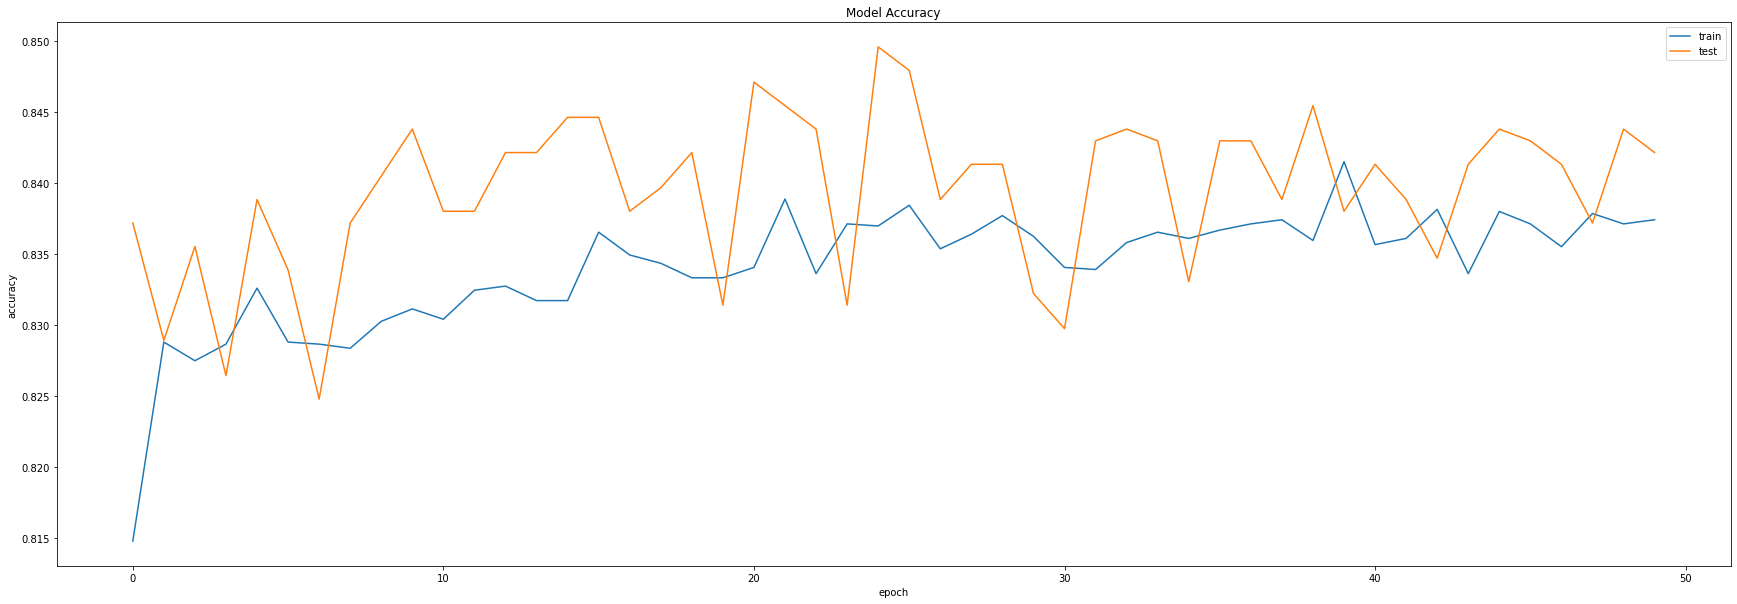

In [ ]:
%matplotlib inline
# Model accuracy
plt.figure(figsize=(30,10))
plt.plot(MLP_pre.history['accuracy'])
plt.plot(MLP_pre.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

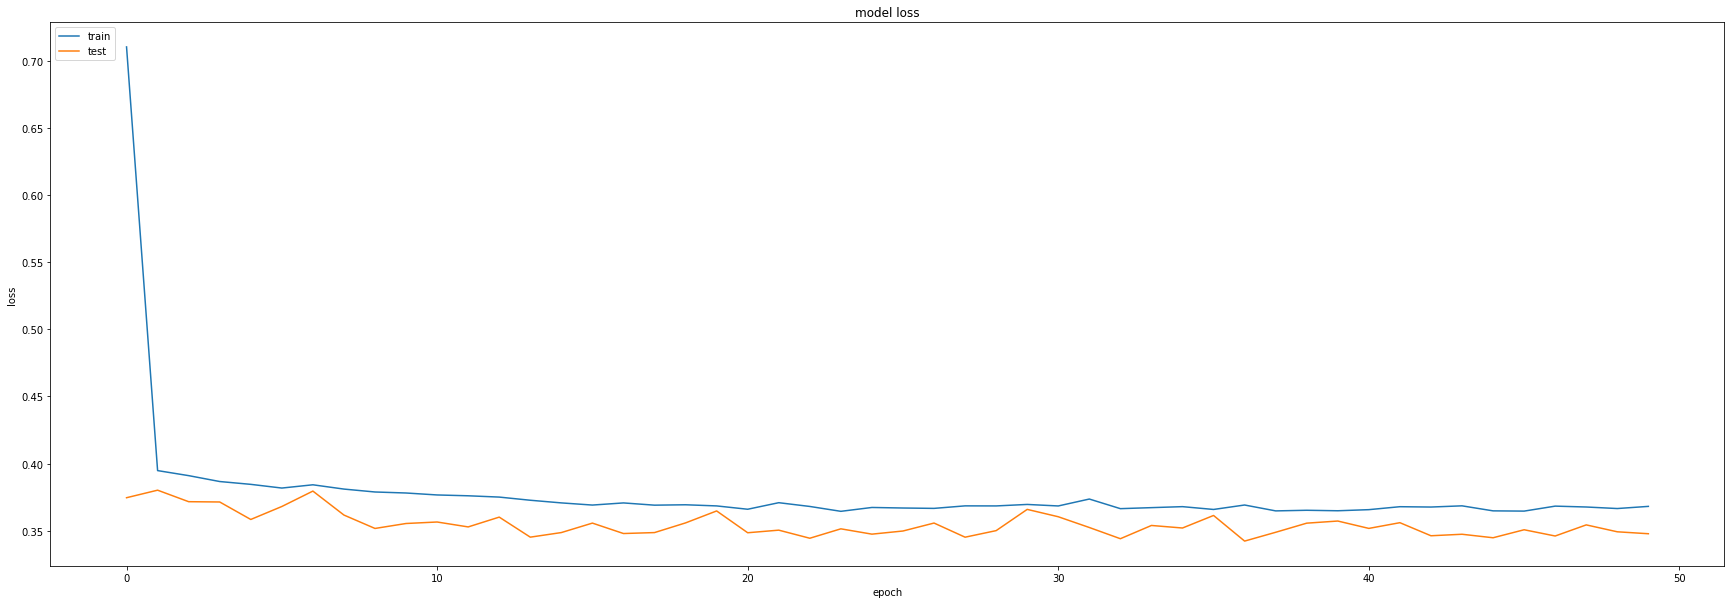

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(MLP_pre.history['loss'])
plt.plot(MLP_pre.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

============================================================

# HIGHEST ACCURACY = 1 Hiddenlayer (50)

In [ ]:
# No drop out
def createMLP():
  model = Sequential()

  model.add(Dense(50, input_dim=12, activation='relu'))

  model.add(Dense(2,activation='sigmoid'))

  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  
  return model

In [ ]:
model = createMLP()
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 50)                650       
                                                                 
 dense_31 (Dense)            (None, 2)                 102       
                                                                 
Total params: 752
Trainable params: 752
Non-trainable params: 0
_________________________________________________________________


In [ ]:
MLP_pre = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs= 50, batch_size=10)

Epoch 1/50
686/686 [==============================] - 2s 2ms/step - loss: 0.4057 - accuracy: 0.8171 - val_loss: 0.3512 - val_accuracy: 0.8430
Epoch 2/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3629 - accuracy: 0.8348 - val_loss: 0.3416 - val_accuracy: 0.8397
Epoch 3/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3543 - accuracy: 0.8360 - val_loss: 0.3335 - val_accuracy: 0.8504
Epoch 4/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3488 - accuracy: 0.8403 - val_loss: 0.3334 - val_accuracy: 0.8430
Epoch 5/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3452 - accuracy: 0.8390 - val_loss: 0.3320 - val_accuracy: 0.8504
Epoch 6/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3414 - accuracy: 0.8421 - val_loss: 0.3227 - val_accuracy: 0.8471
Epoch 7/50
686/686 [==============================] - 1s 2ms/step - loss: 0.3380 - accuracy: 0.8449 - val_loss: 0.3244 - val_accuracy: 0.8529
Epoch 

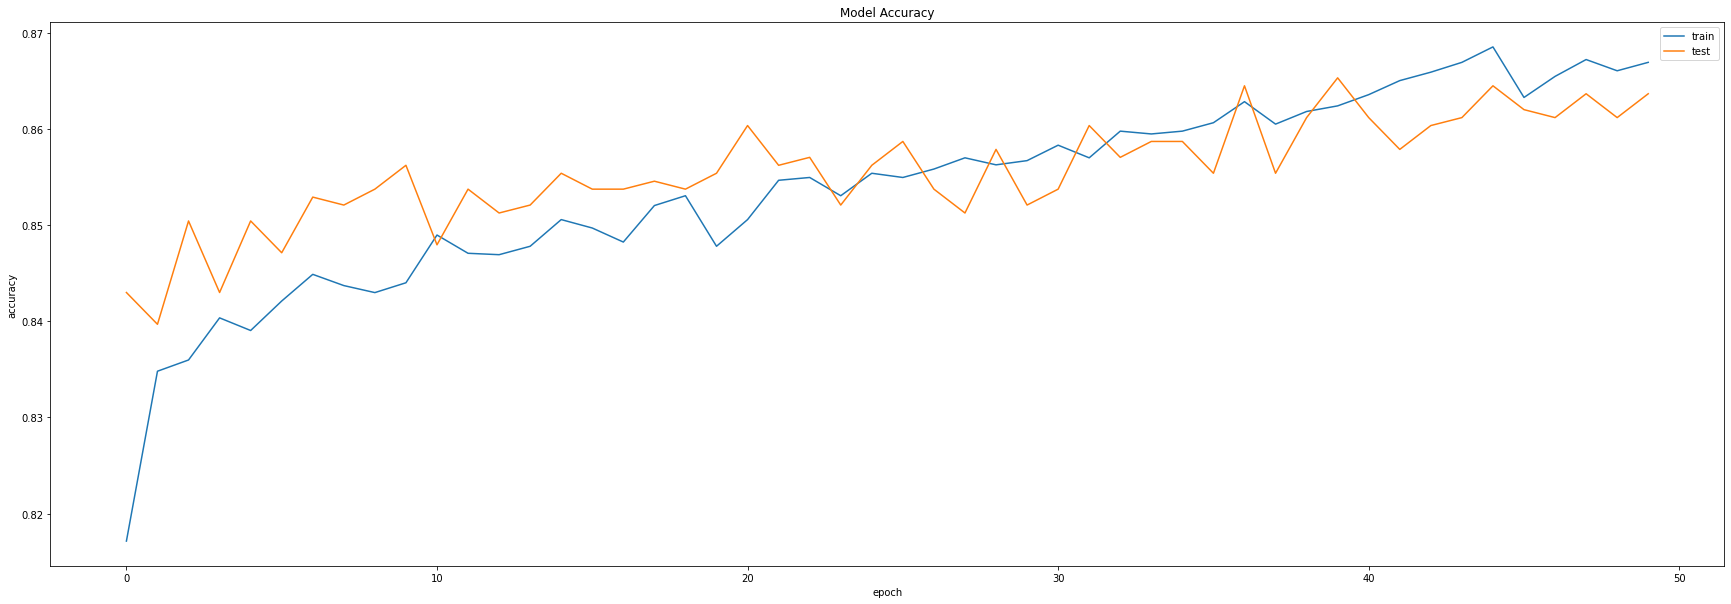

In [ ]:
%matplotlib inline
# Model accuracy
plt.figure(figsize=(30,10))
plt.plot(MLP_pre.history['accuracy'])
plt.plot(MLP_pre.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

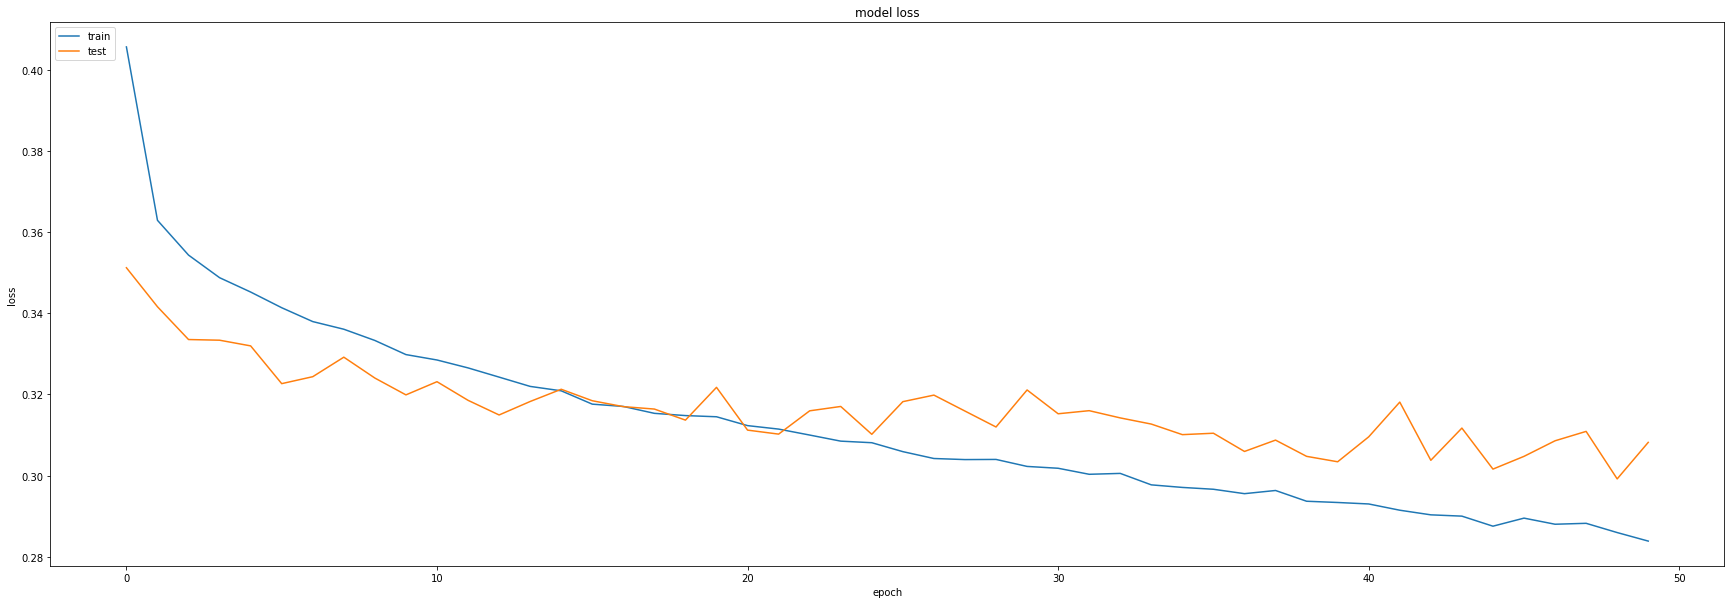

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(MLP_pre.history['loss'])
plt.plot(MLP_pre.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()